# **Data Science for Decision Support**
 

**Executor:** Raniyaharini Rajendran




# Problem 1: 'Dimensionality reduction' 

# **`Task 1 “Dataset preparation”  `**

Read your individual dataset, remove the indicated variables, separate independent and target
variables. Dimension reduction will be performed for independent variables only. Remove all
variables, which are not numeric. Fill non available with the mean value. Scale your data with
standardScaler. All data will be used, there should be no training and testset separation. 

1)	Read the data from your individual variant into Python notebook

In [ ]:
#Write your code here 
#Write your code here 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler     
from sklearn import metrics,svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import time
import random
from scipy.stats import uniform, randint
import ipywidgets as widgets
from IPython.display import clear_output

In [ ]:
#add more cell if needed to each code cell
concrete_df = pd.read_csv('concrete.csv')

In [ ]:
concrete_df.shape

(1030, 9)

In [ ]:
#Write your code here 
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


It clearly shows that the dataset consists of only numeric values hence converting categorical to numerical is not necessary

In [ ]:
concrete_df.describe(include = 'all')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
#Checking for NAN values
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no null values in the concrete dataset. Therefore handling NaN values can be avoided

In [ ]:
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [ ]:
duplicate_rows = concrete_df[concrete_df.duplicated()]
print("There are {} duplicate rows in the dataset".format(duplicate_rows.shape[0]))
duplicate_rows

There are 25 duplicate rows in the dataset


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [ ]:
#concrete_df.drop(index=[2,5,1026,1029],columns=['slag','coarseagg'],inplace=False)

,cement,ash,water,superplastic,fineagg,age,strength
0,540.0,0.0,162.0,2.5,676.0,28,79.99
1,540.0,0.0,162.0,2.5,676.0,28,61.89
3,332.5,0.0,228.0,0.0,594.0,365,41.05
4,198.6,0.0,192.0,0.0,825.5,360,44.30
6,380.0,0.0,228.0,0.0,594.0,365,43.70
...,...,...,...,...,...,...,...
1023,159.8,0.0,168.4,12.2,688.2,28,39.46
1024,166.0,0.0,183.2,12.7,826.8,28,37.92
1025,276.4,90.3,179.6,8.9,768.3,28,44.28
1027,148.5,108.6,192.7,6.1,780.0,28,23.70


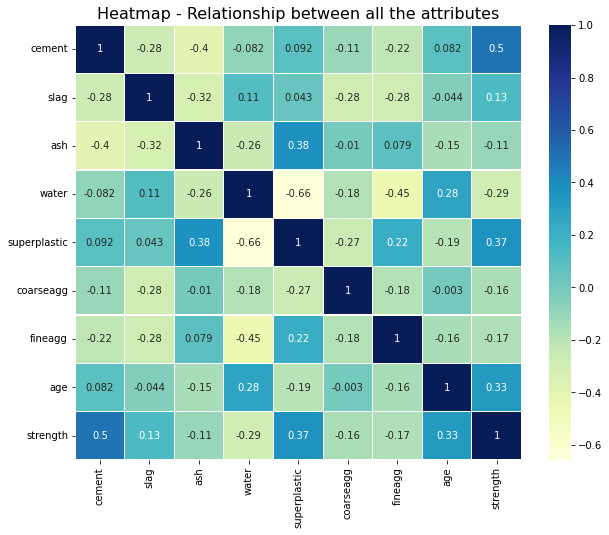

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(concrete_df.corr(), cmap ="YlGnBu", linewidths = 0.1,annot = True) #Plot contents of correlation matrix as a heatmap
plt.title("Heatmap - Relationship between all the attributes",fontdict={'fontsize': 16})  #Title of the plot
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1dba0ce10>,
      dtype=object)

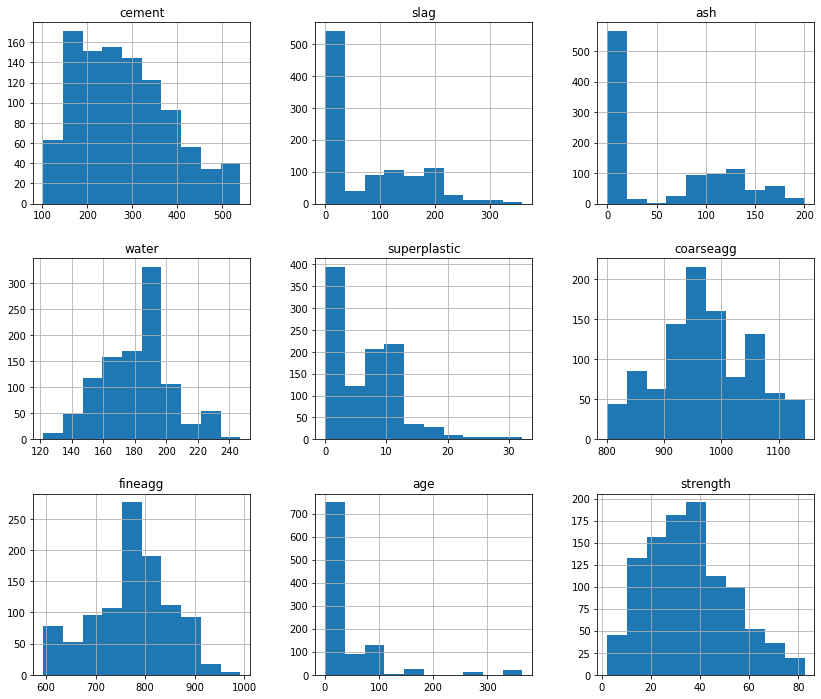

In [ ]:
concrete_df.hist(figsize = (14,12))

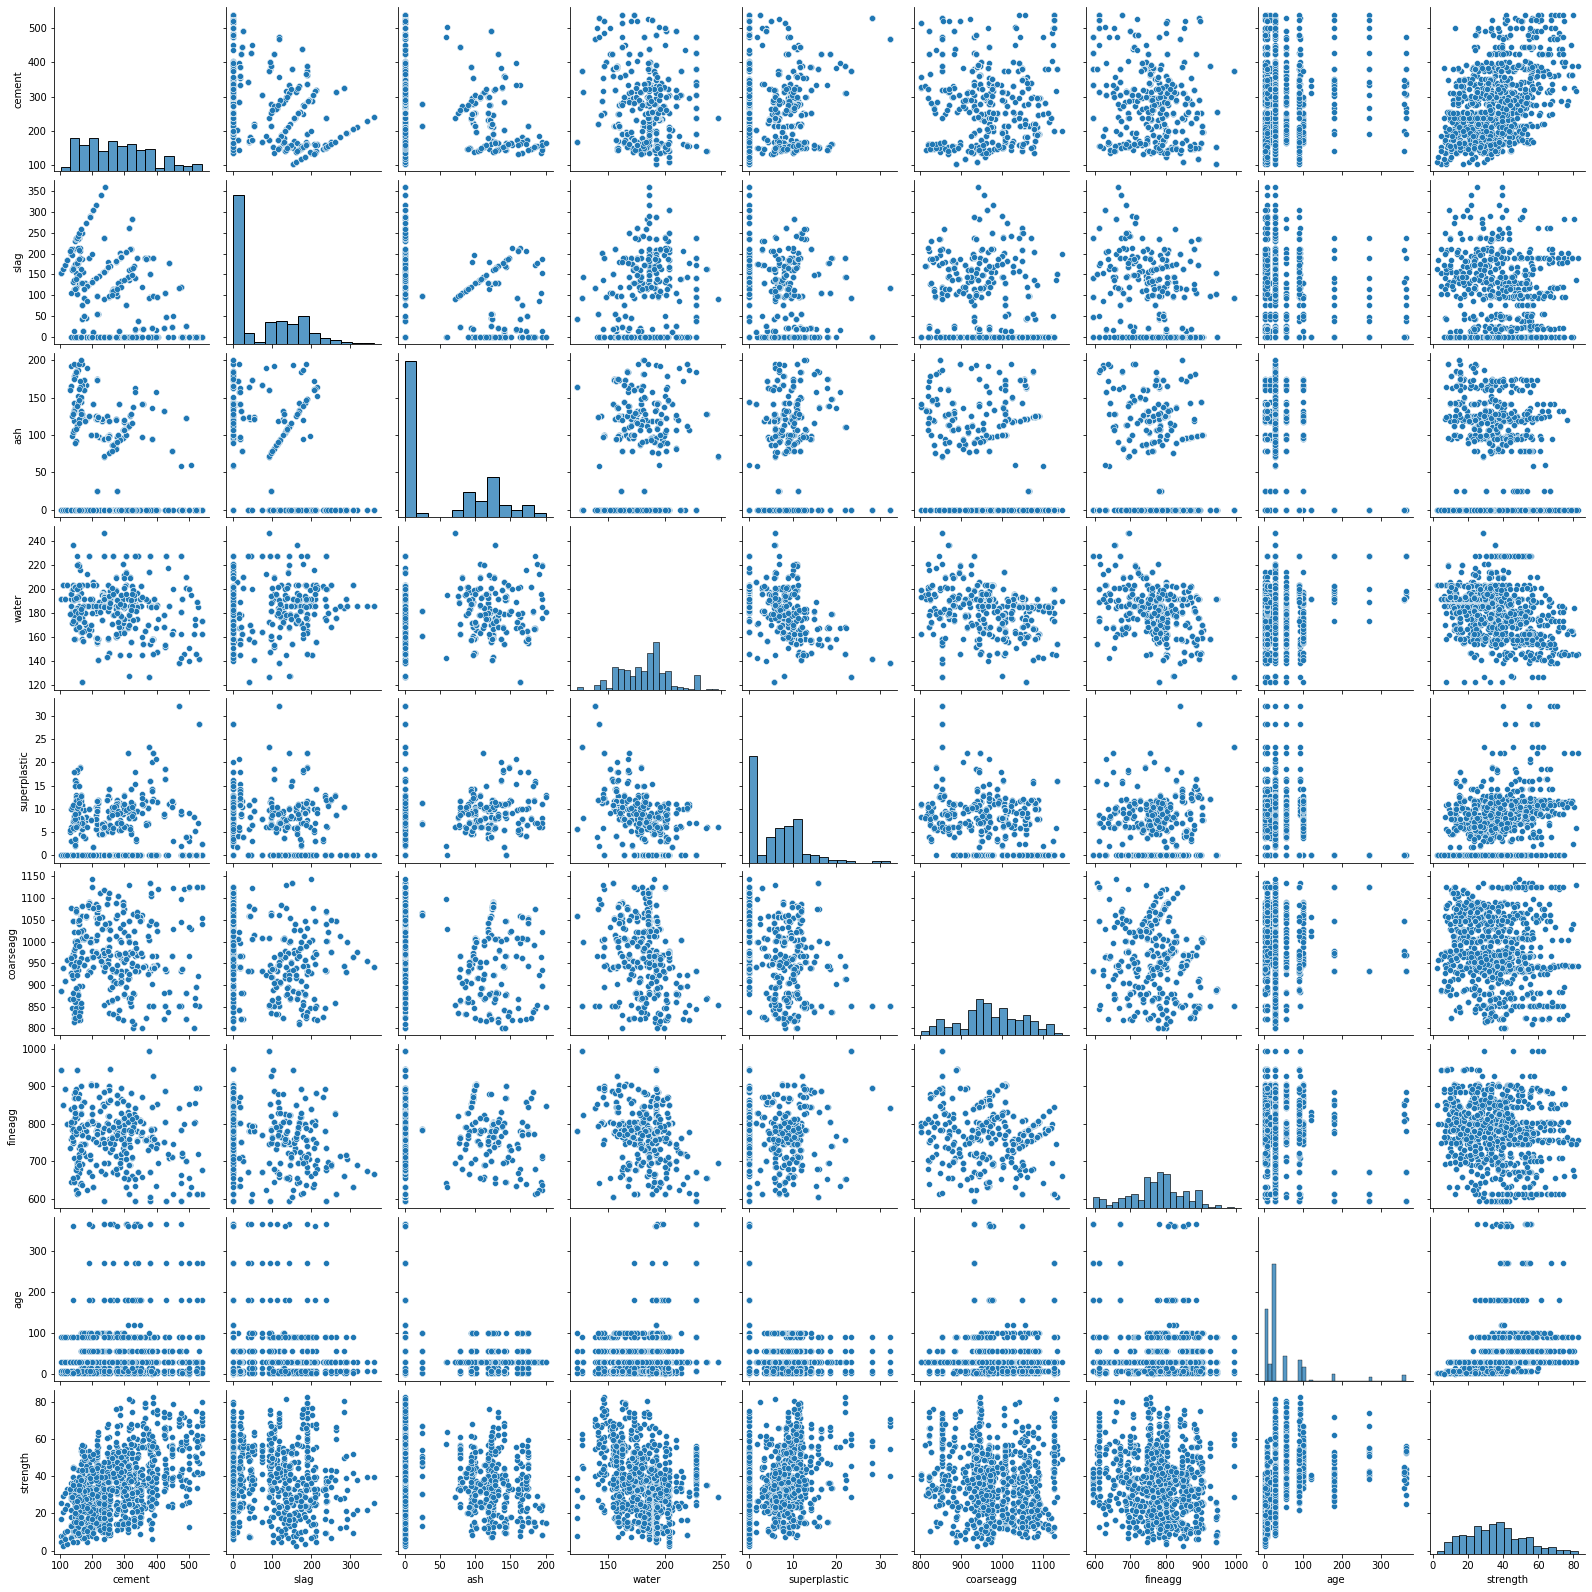

In [ ]:
sns.pairplot(concrete_df)

***Comment the results***

The dataset mainly concerns with studying the factors that influence the Compressive Strength of Concrete.

There are 1030 instances, and there are no missing/unknown/invalid values.

There are 9 attributes --> 8 input variables and 1 output variable

Seven input variables represent the amount of raw material (measured in kg/m³) and one represents Age (in Days). The target variable is Concrete Compressive Strength measured in (MPa — Mega Pascal).

There are no categorical variables. There are only numeric values

Divide your dataset into 2 parts


In [ ]:
#Write your code here 
X = concrete_df.drop(["strength"], axis =1)
y = concrete_df["strength"]

Scale your whole dataset with Standard Scaler

In [ ]:
#Standard Scaler
X = StandardScaler().fit_transform(X)


# **`Task 2 “PCA”   `**

**PCA PLOTS WITH 2 COMPONENTS:**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
print("original shape:   ", X.shape)
print("transformed shape:", principalComponents.shape)

original shape:    (1030, 8)
transformed shape: (1030, 2)


In [ ]:
finalDf = pd.concat([principalDf, concrete_df[['strength']]], axis = 1)

In [ ]:
finalDf

,principal component 1,principal component 2,strength
0,0.679326,-1.457856,79.99
1,0.686646,-1.579441,61.89
2,4.155803,0.360341,40.27
3,4.594366,0.170789,41.05
4,2.363330,-0.275733,44.30
...,...,...,...
1025,-0.524788,1.252192,44.28
1026,-0.834653,0.747159,31.18
1027,-0.184897,1.253139,23.70
1028,-0.283700,1.274286,32.77


In [ ]:
pca.components_

array([[ 0.09840137,  0.17726197, -0.39466185,  0.54700395, -0.50594541,
         0.03792808, -0.40192597,  0.29147949],
       [-0.11373709,  0.6860529 , -0.14294751,  0.05325628,  0.2829296 ,
        -0.62994342, -0.01939111, -0.12598089]])

In [ ]:
pca.explained_variance_ratio_

array([0.28501242, 0.17700935])

In [ ]:
pca.explained_variance_ratio_.sum()*100

46.20217701866842

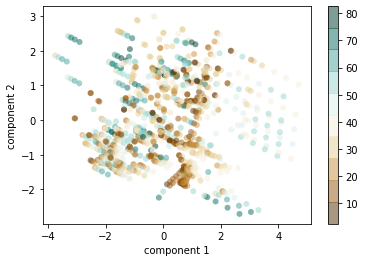

In [ ]:
#Plot PCA1 and PCA2
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=finalDf.strength, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BrBG', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

These points are the projection of each data point along the directions with the largest variance

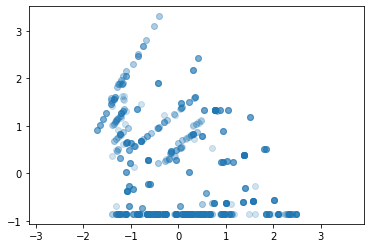

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = plt.gca()
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

It is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data

**PCA PLOTS WITH 3 COMPONENTS:**

In [ ]:
pca1 = PCA(n_components=3)
principalComponents1 = pca1.fit_transform(X)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [ ]:
print("original shape:   ", X.shape)
print("transformed shape:", principalComponents1.shape)

original shape:    (1030, 8)
transformed shape: (1030, 3)


In [ ]:
finalDf1 = pd.concat([principalDf1, concrete_df[['strength']]], axis = 1)
finalDf1

,principal component 1,principal component 2,principal component 3,strength
0,0.679326,-1.457856,2.387624,79.99
1,0.686646,-1.579441,2.354023,61.89
2,4.155803,0.360341,0.360767,40.27
3,4.594366,0.170789,0.512013,41.05
4,2.363330,-0.275733,-0.277097,44.30
...,...,...,...,...
1025,-0.524788,1.252192,-0.023449,44.28
1026,-0.834653,0.747159,0.412658,31.18
1027,-0.184897,1.253139,-1.475275,23.70
1028,-0.283700,1.274286,-0.636943,32.77


In [ ]:
pca1.components_

array([[ 0.09840137,  0.17726197, -0.39466185,  0.54700395, -0.50594541,
         0.03792808, -0.40192597,  0.29147949],
       [-0.11373709,  0.6860529 , -0.14294751,  0.05325628,  0.2829296 ,
        -0.62994342, -0.01939111, -0.12598089],
       [ 0.81420224, -0.17179437, -0.40822055, -0.21318975,  0.23459653,
        -0.17408781, -0.00456921,  0.10052137]])

In [ ]:
total_var = pca1.explained_variance_ratio_.sum()*100
total_var

62.95316493778726

In [ ]:
#Plot PCA1,PCA2,PCA3

import plotly.express as px
from sklearn.decomposition import PCA 

fig = px.scatter_3d(principalComponents1,x=0,y=1,z=2,color=finalDf1['strength'],title = f'Total Variance:{total_var:2f}%',labels={'0':'PC1','1':'PC2','2':'PC3'})
fig.show()

# **`Task 3 “TSNE”  `**

**TSNE PLOTS WITH 2 COMPONENTS:**

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1030 samples in 0.002s...
[t-SNE] Computed neighbors for 1030 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1030
[t-SNE] Computed conditional probabilities for sample 1030 / 1030
[t-SNE] Mean sigma: 0.888394
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.260605
[t-SNE] KL divergence after 300 iterations: 0.509388


In [ ]:
tsneDf = pd.DataFrame(data = tsne_results
             , columns = ['TSNE component 1', 'TSNE component 2'])


In [ ]:
print("original shape:   ", X.shape)
print("transformed shape:", tsne_results.shape)

original shape:    (1030, 8)
transformed shape: (1030, 2)


In [ ]:
finalDf3 = pd.concat([tsneDf, concrete_df[['strength']]], axis = 1)
finalDf3

,TSNE component 1,TSNE component 2,strength
0,-3.382011,14.793683,79.99
1,-3.437898,14.857058,61.89
2,-17.943241,-0.409998,40.27
3,-18.542768,0.235575,41.05
4,-18.909613,2.779272,44.30
...,...,...,...
1025,7.018572,-9.502069,44.28
1026,5.003103,5.937683,31.18
1027,9.309900,-10.826788,23.70
1028,-6.820541,-9.833689,32.77


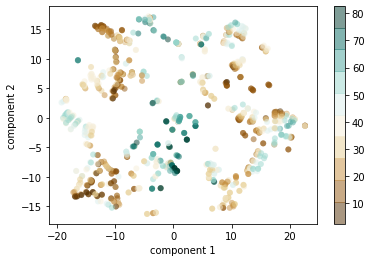

In [ ]:
#Plot PCA1 and PCA2
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
            c=finalDf3.strength, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BrBG', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**TSNE PLOTS WITH 3 COMPONENTS:**

In [ ]:
from sklearn.manifold import TSNE
tsne1 = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results1 = tsne1.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1030 samples in 0.003s...
[t-SNE] Computed neighbors for 1030 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1030
[t-SNE] Computed conditional probabilities for sample 1030 / 1030
[t-SNE] Mean sigma: 0.888394
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.714767
[t-SNE] KL divergence after 300 iterations: 0.417202


In [ ]:
tsneDf1 = pd.DataFrame(data = tsne_results1,
             columns = ['TSNE component 1', 'TSNE component 2','TSNE component 3'])


In [ ]:
print("original shape:   ", X.shape)
print("transformed shape:", tsne_results1.shape)

original shape:    (1030, 8)
transformed shape: (1030, 3)


In [ ]:
finalDf4 = pd.concat([tsneDf1, concrete_df[['strength']]], axis = 1)
finalDf4

,TSNE component 1,TSNE component 2,TSNE component 3,strength
0,0.123571,2.652869,-7.571549,79.99
1,0.092815,2.597343,-7.623050,61.89
2,6.537233,-6.594292,-1.448093,40.27
3,7.205493,-6.995441,-1.803450,41.05
4,8.835228,-5.637910,-2.479299,44.30
...,...,...,...,...
1025,-1.290695,-3.666575,2.698947,44.28
1026,-1.644290,-2.712994,-0.867354,31.18
1027,-3.619271,-4.545007,3.607457,23.70
1028,2.004520,-2.663161,7.028243,32.77


In [ ]:
import plotly.express as px

fig = px.scatter_3d(tsne_results1,x=0,y=1,z=2,color=finalDf4['strength'],title = 'TSNE 3-D Plot',labels={'0':'TSNE1','1':'TSNE2','2':'TSNE3'})
fig.show()

**TSNE with changed perplexity and n_iter values**

In [ ]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=3, verbose=1, perplexity=100, n_iter=400)
tsne_results2 = tsne2.fit_transform(X)

tsneDf2 = pd.DataFrame(data = tsne_results2,
             columns = ['TSNE component 1', 'TSNE component 2','TSNE component 3'])

finalDf5 = pd.concat([tsneDf2, concrete_df[['strength']]], axis = 1)
finalDf5

import plotly.express as px

fig = px.scatter_3d(tsne_results2,x=0,y=1,z=2,color=finalDf5['strength'],title = 'TSNE 3-D Plot',labels={'0':'TSNE1','1':'TSNE2','2':'TSNE3'})
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1030 samples in 0.002s...
[t-SNE] Computed neighbors for 1030 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1030
[t-SNE] Computed conditional probabilities for sample 1030 / 1030
[t-SNE] Mean sigma: 1.191962
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.977787
[t-SNE] KL divergence after 400 iterations: 0.319746


t-SNE differs from PCA by preserving only small pairwise distances. Therefore the cluster plots are more segmented when compared to PCA

# Problem 2: 'Cluster Analysis' 

# **`Task 1 ““kMeans Clustering”   `**

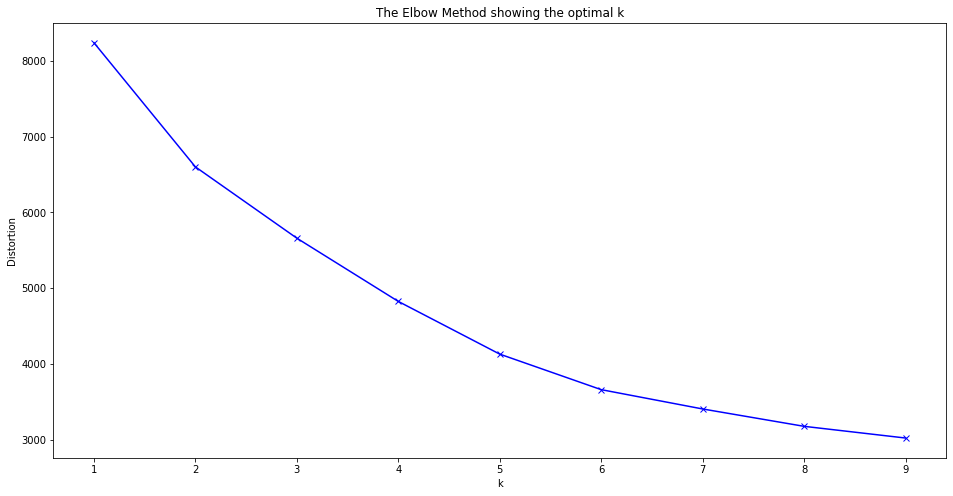

In [ ]:
#Using elbow method to find the optimal value for cluster
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the “elbow” is the number 6 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 3

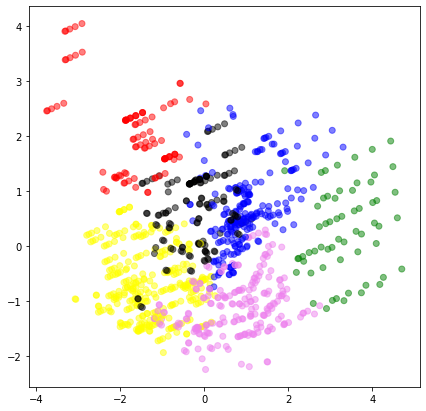

In [ ]:
#Kmeans clustering with PCA (2 components)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(principalComponents1)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(principalComponents1[:,0],principalComponents1[:,2], c= label_color, alpha=0.5) 
plt.show()

In [ ]:
#Kmeans clustering with PCA (3 components)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)

#Compute cluster centers and predict cluster indices
X_clustered1 = kmeans.fit_predict(principalComponents1)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color1 = [LABEL_COLOR_MAP[l] for l in X_clustered1]

fig = px.scatter_3d(principalComponents1,x=0,y=1,z=2,color=label_color1,title = 'PCA 3-D Plot',labels={'0':'PCA1','1':'PCA2','2':'PCA3','3':'PCA4'})
fig.show()

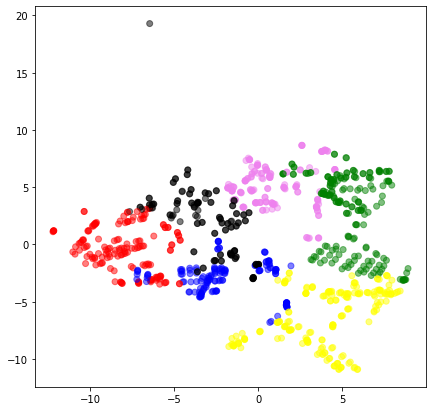

In [ ]:
#Kmeans clustering with TSNE (2 components)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)

#Compute cluster centers and predict cluster indices
X_clustered1 = kmeans.fit_predict(tsne_results1)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered1]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(tsne_results1[:,0],tsne_results1[:,2], c= label_color, alpha=0.5) 
plt.show()

In [ ]:
#Kmeans clustering with TSNE (3 components)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)

#Compute cluster centers and predict cluster indices
X_clustered2 = kmeans.fit_predict(tsne_results2)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color2 = [LABEL_COLOR_MAP[l] for l in X_clustered2]

fig = px.scatter_3d(tsne_results2,x=0,y=1,z=2,color=label_color2,title = 'TSNE 3-D Plot',labels={'0':'TSNE1','1':'TSNE2','2':'TSNE3','3':'TSNE4'})
fig.show()

# **`Task 2 “Hierarchical clustering”   `**

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

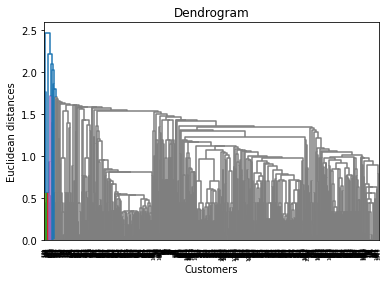

In [ ]:
#Hierarchial clustering - method:single
# Using the dendrogram to find the optimal numbers of clusters. 

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method  = "single"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

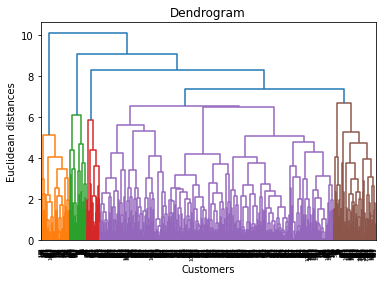

In [ ]:
#Hierarchial clustering - method:complete
# Using the dendrogram to find the optimal numbers of clusters. 

dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

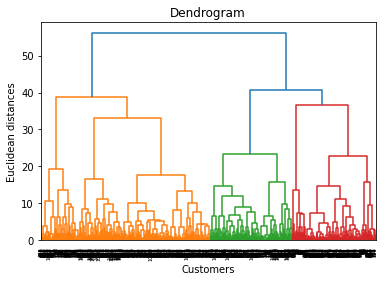

In [ ]:
#Hierarchial clustering - method:ward
# Using the dendrogram to find the optimal numbers of clusters. 
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Out of the three methods of dendogram, ward method provides a sensible dendogram with specific values

Using PCA

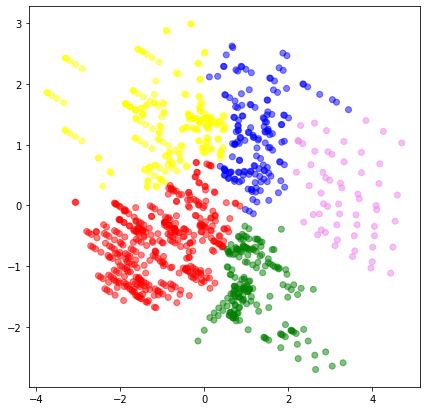

In [ ]:
#Hierarchial clustering with PCA (2 components)
#Here we are using AgglomerativeClustering which is one of the algorithm of hierarchiall clustering
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_hc=hc.fit_predict(principalComponents)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color = [LABEL_COLOR_MAP[l] for l in y_hc]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= label_color, alpha=0.5) 
plt.show()

In [ ]:
#Hierarchial clustering with PCA (3 components)
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_hc1=hc.fit_predict(principalComponents1)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet'}
label_color2 = [LABEL_COLOR_MAP[l] for l in y_hc1]

fig = px.scatter_3d(principalComponents1,x=0,y=1,z=2,color=label_color2,title = 'PCA 3-D Plot',labels={'0':'PCA1','1':'PCA2','2':'PCA3'})
fig.show()

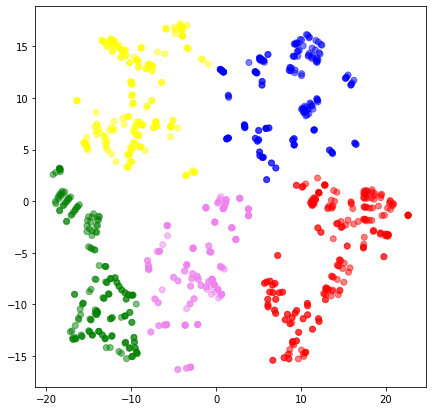

In [ ]:
#Hierarchial clustering with TSNE (2 components)
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_hc2=hc.fit_predict(tsne_results)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color = [LABEL_COLOR_MAP[l] for l in y_hc2]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c= label_color, alpha=0.5) 
plt.show()

In [ ]:
#Hierarchial clustering with TSNE (3 components)
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_hc3=hc.fit_predict(tsne_results1)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet'}
label_color2 = [LABEL_COLOR_MAP[l] for l in y_hc3]

fig = px.scatter_3d(tsne_results1,x=0,y=1,z=2,color=label_color2,title = 'TSNE 3-D Plot',labels={'0':'TSNE1','1':'TSNE2','2':'TSNE3'})
fig.show()

In [125]:
Compare=pd.DataFrame(columns = ['Kmeans', 'Hierarchial','DBSCAN'])


In [126]:
Compare['Kmeans'] = pd.Series(X_clustered)

In [127]:
Compare['Hierarchial'] = pd.Series(y_hc)

In [128]:
#Comparing the clustering results of 2 models
Compare

,Kmeans,Hierarchial,DBSCAN
0,5,1,NaN
1,5,1,NaN
2,4,4,NaN
3,4,4,NaN
4,4,4,NaN
...,...,...,...
1025,2,2,NaN
1026,2,2,NaN
1027,2,2,NaN
1028,1,2,NaN


# **`Task 3 “DBScan clustering”   `**

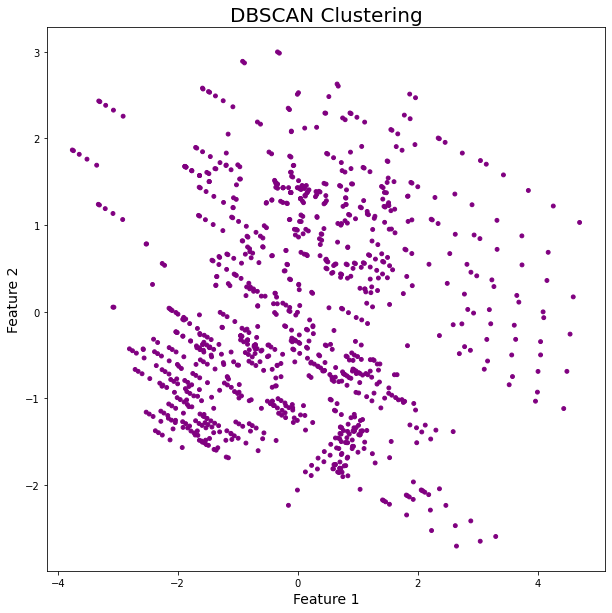

In [144]:
#DBSCAN clustering with PCA (2 components)
from sklearn.cluster import DBSCAN
import matplotlib
db = DBSCAN(eps=3)
db_pred=db.fit_predict(principalComponents)

'''LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color = [LABEL_COLOR_MAP[l] for l in db_pred]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= label_color, alpha=0.5) 
plt.show()'''

colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=db.labels_ ,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [168]:
#DBSCAN clustering with PCA (3 components)

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3)
db_pred=db.fit_predict(principalComponents1)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet'}
label_color2 = [LABEL_COLOR_MAP[l] for l in db_pred]

fig = px.scatter_3d(principalComponents1,x=0,y=1,z=2,color=label_color2,title = 'PCA 3-D Plot',labels={'0':'PCA1','1':'PCA2','2':'PCA3'})
fig.show()

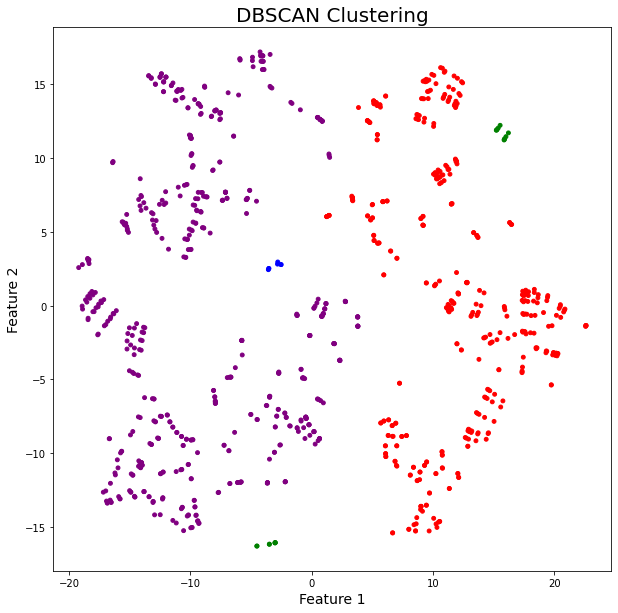

In [164]:
#DBSCAN clustering with TSNE (2 components)

from sklearn.cluster import DBSCAN
import matplotlib
db = DBSCAN(eps=3)
db_pred=db.fit_predict(tsne_results)

'''LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color = [LABEL_COLOR_MAP[l] for l in db_pred]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= label_color, alpha=0.5) 
plt.show()'''

colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1],c=db.labels_ ,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

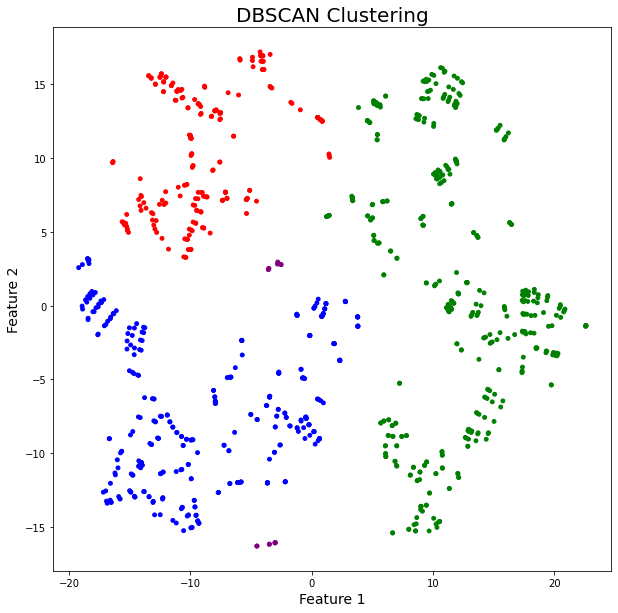

In [169]:
#DBSCAN clustering-Experiment with different parameters.

from sklearn.cluster import DBSCAN
import matplotlib
db = DBSCAN(eps=3,min_samples=10,leaf_size=30)
db_pred=db.fit_predict(tsne_results)

'''LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color = [LABEL_COLOR_MAP[l] for l in db_pred]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= label_color, alpha=0.5) 
plt.show()'''

colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1],c=db.labels_ ,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [129]:
Compare['DBSCAN'] = pd.Series(db_pred)

In [130]:
#Comparing the clustering results of 3 models
Compare

,Kmeans,Hierarchial,DBSCAN
0,5,1,0
1,5,1,0
2,4,4,0
3,4,4,0
4,4,4,0
...,...,...,...
1025,2,2,0
1026,2,2,0
1027,2,2,0
1028,1,2,0


In [161]:
rows = Compare[Compare.duplicated()]
print("There are {} duplicate rows in the dataset".format(rows.shape[0]))
rows.shape

There are 1012 duplicate rows in the dataset


(1012, 3)

This shows that out of 1030 objects 1012 have been similarily clustered

# **`Task 4 “Reduced dataset clustering”  `**

In [ ]:
pca_final = PCA(n_components=5)
pca_comp_final = pca_final.fit_transform(X)

principal_final = pd.DataFrame(data = pca_comp_final
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

total_var = pca_final.explained_variance_ratio_.sum()*100
print(total_var)

87.52400072178594


In [ ]:
final = pd.DataFrame(data = principal_final,
             columns = ['PCA component 1', 'PCA component 2','PCA component 3','PCA component 4','PCA component 5'])

finalDf6 = pd.concat([principal_final, concrete_df[['strength']]], axis = 1)
finalDf6


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,strength
0,0.679326,-1.457856,2.387624,-1.352069,0.396700,79.99
1,0.686646,-1.579441,2.354023,-1.457415,0.390315,61.89
2,4.155803,0.360341,0.360767,1.475211,1.773799,40.27
3,4.594366,0.170789,0.512013,2.269524,2.116865,41.05
4,2.363330,-0.275733,-0.277097,2.627577,-0.252651,44.30
...,...,...,...,...,...,...
1025,-0.524788,1.252192,-0.023449,0.458332,0.473107,44.28
1026,-0.834653,0.747159,0.412658,1.813641,0.554254,31.18
1027,-0.184897,1.253139,-1.475275,0.590097,0.208133,23.70
1028,-0.283700,1.274286,-0.636943,-0.908828,-0.588145,32.77


In [147]:
#Comparing dataframe for clustering models
Results=pd.DataFrame(columns = ['Kmeans', 'Hierarchial','DBSCAN'])

#Comparing silhoutte dataframe for clustering models
sil=pd.DataFrame(columns = ['Kmeans', 'Hierarchial','DBSCAN'])


We can see that percentage of explained variance is more than 85% when the component reaches 5

**Kmeans Clustering**

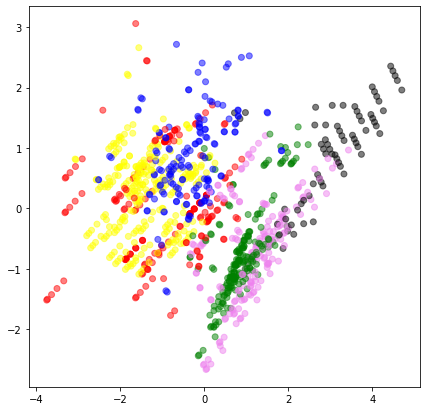

Silhouette score of kmeans: 0.2322465085141844


In [154]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)

#Compute cluster centers and predict cluster indices
reduced_df = kmeans.fit_predict(pca_comp_final)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color = [LABEL_COLOR_MAP[l] for l in reduced_df]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_comp_final[:,0],pca_comp_final[:,4], c= label_color, alpha=0.5) 
plt.show()

#Adding the Kmeans clustering result to dataframe
Results['Kmeans'] = pd.Series(reduced_df)

#Calculating silhoutte score
kmeans_labels = kmeans.labels_
kmeans_sil=metrics.silhouette_score(concrete_df, kmeans.labels_, metric='euclidean')
print('Silhouette score of kmeans:',kmeans_sil)

#Adding the silhoutte score of Kmeans clustering result to dataframe
sil['Kmeans'] = pd.Series(kmeans_sil)

**Hierarchial Clustering**

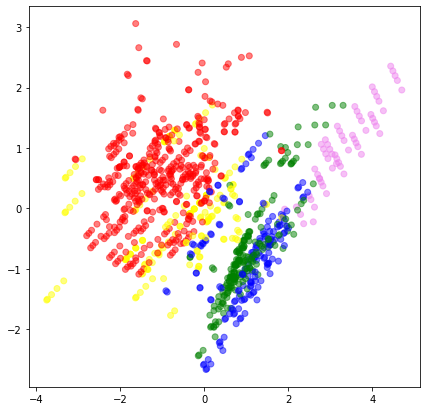

Silhouette score of hierarchial clustering: 0.20596561997361512


In [156]:
from sklearn.cluster import AgglomerativeClustering 
hc_final = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
reduced_hc=hc.fit_predict(pca_comp_final)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'violet', 5: 'black'}
label_color = [LABEL_COLOR_MAP[l] for l in reduced_hc]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_comp_final[:,0],pca_comp_final[:,4], c= label_color, alpha=0.5) 
plt.show()

#Adding the hierarchial clustering result to dataframe
Results['Hierarchial'] = pd.Series(reduced_hc)

#Calculating silhoutte score
hr_sil=metrics.silhouette_score(concrete_df, reduced_hc, metric='euclidean')
print('Silhouette score of hierarchial clustering:',hr_sil)

#Adding the silhoutte score of Hierarchial clustering result to dataframe
sil['DBSCAN'] = pd.Series(hr_sil)

**DBSCAN Clustering**

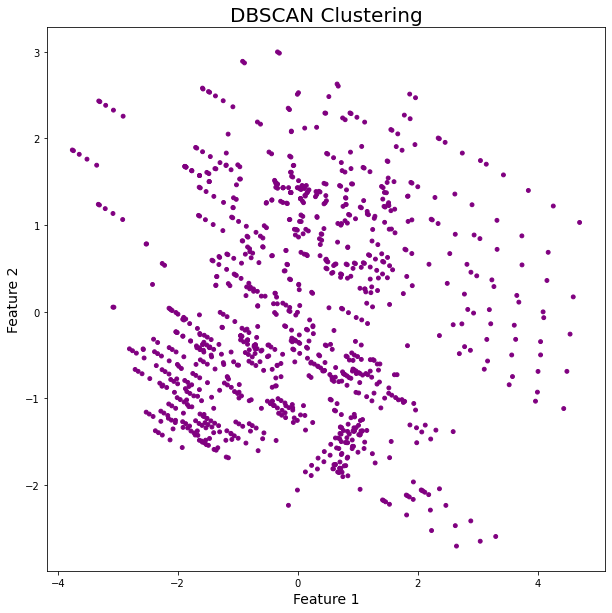

Silhouette score of dbscan: -0.1032792020608902


In [153]:
from sklearn.cluster import DBSCAN
import matplotlib
db_final = DBSCAN()
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
db_reduced=db_final.fit(pca_comp_final)

colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(pca_comp_final[:,0],pca_comp_final[:,1],c=db.labels_ ,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

#Adding the DBSCAN clustering result to dataframe
Results['DBSCAN'] = pd.Series(db_reduced)

#Calculating silhoutte score
db_labels = db_final.labels_
db_sil=metrics.silhouette_score(concrete_df, db_final.labels_, metric='euclidean')
print('Silhouette score of dbscan:',db_sil)

#Adding the silhoutte score of DBSCAN clustering result to dataframe
sil['DBSCAN'] = pd.Series(db_sil)

In [ ]:
#Clustering results dataframe
Results

,Kmeans,Hierarchial,DBSCAN
0,0,2,0
1,0,2,0
2,2,4,0
3,2,4,0
4,2,4,0
...,...,...,...
1025,4,0,0
1026,4,0,0
1027,4,0,0
1028,5,3,0


In [163]:
reduced_rows = Results[Results.duplicated()]
print("There are {} duplicate rows in the dataset".format(reduced_rows.shape[0]))
reduced_rows.shape

There are 1013 duplicate rows in the dataset


,Kmeans,Hierarchial,DBSCAN
3,5,4,NaN
4,5,4,NaN
5,5,4,NaN
6,5,4,NaN
7,5,4,NaN


This shows that out of 1030 objects 1013 have been similarily clustered

In [151]:
#Silhoutte results dataframe
sil

,Kmeans,Hierarchial,DBSCAN
0,0.234083,0.205966,-0.103279


The results from three clustering model clearly shows that kmeans clustering has performed better than the other clustering models